# Model Training 

## 1. Import Data and required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling packages
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop(columns = ['math score'], axis = 1)
Y = df['math score']

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

### Transform categorical features

In [7]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_encoder, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)


In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
# separate data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 19), (200, 19), (800,), (200,))

## Create an evaluation fucntion to give all metrics after model training

In [17]:
def evaluate_regression_models(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2squared = r2_score(true, predicted)
    return mae, rmse, r2squared


In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # train the model

    # Make predictions

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate the model

    model_train_mea, model_train_rmse, model_train_r2 = evaluate_regression_models(Y_train, Y_train_pred)
    model_test_mea, model_test_rmse, model_test_r2 = evaluate_regression_models(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance on Training Set:")
    print("- Root Mean Squared Error: {:.4f}".format(float(model_train_rmse)))
    print(" - Mean Absolute Error: {:.4f}".format(float(model_train_mea)))
    print(" - R2 Score: {:.4f}".format(float(model_train_r2)))

    print(" --------------------------")

    print("Model Performance on Test Set:")
    print("- Root Mean Squared Error: {:.4f}".format(float(model_test_rmse)))
    print(" - Mean Absolute Error: {:.4f}".format(float(model_test_mea)))
    print(" - R2 Score: {:.4f}".format(float(model_test_r2)))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')







Linear Regression
Model Performance on Training Set:
- Root Mean Squared Error: 5.3231
 - Mean Absolute Error: 4.2667
 - R2 Score: 0.8743
 --------------------------
Model Performance on Test Set:
- Root Mean Squared Error: 5.3940
 - Mean Absolute Error: 4.2148
 - R2 Score: 0.8804


Ridge Regression
Model Performance on Training Set:
- Root Mean Squared Error: 5.3233
 - Mean Absolute Error: 4.2650
 - R2 Score: 0.8743
 --------------------------
Model Performance on Test Set:
- Root Mean Squared Error: 5.3904
 - Mean Absolute Error: 4.2111
 - R2 Score: 0.8806


Lasso Regression
Model Performance on Training Set:
- Root Mean Squared Error: 6.5938
 - Mean Absolute Error: 5.2063
 - R2 Score: 0.8071
 --------------------------
Model Performance on Test Set:
- Root Mean Squared Error: 6.5197
 - Mean Absolute Error: 5.1579
 - R2 Score: 0.8253


K-Nearest Neighbors
Model Performance on Training Set:
- Root Mean Squared Error: 5.7172
 - Mean Absolute Error: 4.5270
 - R2 Score: 0.8550
 ---------

### Results

In [21]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ["ModeL Name", "R2 Score"]).sort_values(by = "R2 Score", ascending=False)

,ModeL Name,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.850895
7,AdaBoost Regressor,0.840712
8,XGBoost Regressor,0.827797
2,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.783681
4,Decision Tree,0.754806
6,Support Vector Regressor,0.728600


### Linear Regression

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)
print("R2 Score for Linear Regression Model: {:.4f}".format(float(score)))


R2 Score for Linear Regression Model: 0.8804


### Plot Y_Pred and Y_test

Text(0.5, 1.0, 'Actual vs Predicted Math Scores')

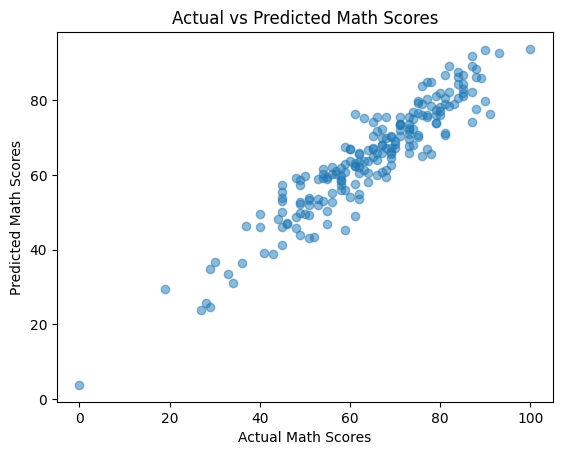

In [25]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")

<Axes: xlabel='math score'>

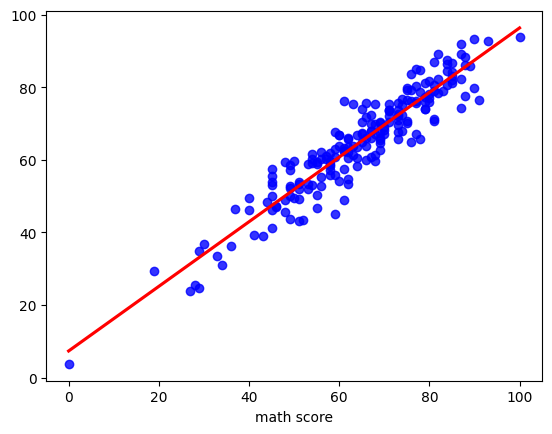

In [27]:
sns.regplot(x=Y_test, y=Y_pred, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

### Difference between Actual and Predicted Value

In [28]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred, "Difference": Y_test - Y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
